In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=6
paper='2004.04168'

# Code-generation prompts

In [116]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
`
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy relev

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's analyze the
Let's analyze the given Hamiltonian equation to identify the necessary elements for the `HartreeFockHamiltonian` class. I need to determine the number of flavors, the basis order, and separate the interacting and non-interacting terms.

### QUESTION 1: Dimension and Basis Order

From the Hamiltonian equation, I see:
1. $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$ - This shows we're summing over a flavor labeled 's' and k-points.
2. $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ - This suggests interaction between different flavors labeled 's' and 's''.
3. $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ - This again involves interaction between different flavors.

The flavor index 's' seems to be the only 

In [7]:
print(generated_code['thinking'])

Let's analyze the given Hamiltonian equation to identify the necessary elements for the `HartreeFockHamiltonian` class. I need to determine the number of flavors, the basis order, and separate the interacting and non-interacting terms.

### QUESTION 1: Dimension and Basis Order

From the Hamiltonian equation, I see:
1. $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$ - This shows we're summing over a flavor labeled 's' and k-points.
2. $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ - This suggests interaction between different flavors labeled 's' and 's''.
3. $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ - This again involves interaction between different flavors.

The flavor index 's' seems to be the only internal degree of freedom mentioned in the Hamiltonian. Since there's 

In [8]:
print(generated_code['text'])

# ANSWER:

1) Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: up, down

2) EXP-VAL DEPENDENT TERMS: {
    r"\langle c_s^\dagger(k_1) c_s(k_1) \rangle": "Mean of `exp_val[s, s, :]`",
    r"\langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle": "Mean of `exp_val[s, s', :]`"
}
  
TERMS:
- $E_s(k) c^\dagger_s(k) c_s(k)$ -> H[s, s, k], NI (Non-interacting)
- $U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ -> H[s', s', k], I (Interacting, Hartree term)
- $U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ -> H[s', s, k], I (Interacting, Fock term)

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a system with spin-1/2 fermions on a triangular lattice.
    
    Args:
        N_shell (int): Number of shells in k-space.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float, optional

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a system with spin-1/2 fermions on a triangular lattice.
    
    Args:
        N_shell (int): Number of shells in k-space.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float, optional): Filling factor. Defaults to 0.5.
    """
    def __init__(self, N_shell: int = 10, parameters: dict = None, filling_factor: float = 0.5):
        self.lattice = 'triangular'
        self.D = (2,)  # LM Task: has to define this tuple - we have 2 spin flavors
        self.basis_order = {'0': 'spin'}
        # Order for spin:
        # 0: spin up
        # 1: spin down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = 0  # Temperature, assuming T=0 as specified
        
        # Set default parameters if none are provided
        if parameters is None:
            parameters = {
   

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_6.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Check k-space

In [90]:
ham = module.HartreeFockHamiltonian(N_shell=10)

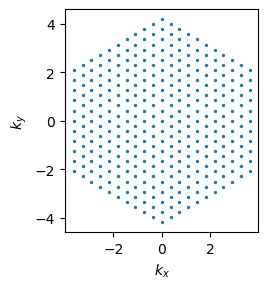

In [91]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Check energy dispersion for non-interacting term

In [92]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [ ]:
ham = module.HartreeFockHamiltonian(N_shell=10,)
setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [94]:
h_nonint = ham.generate_non_interacting()

In [95]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

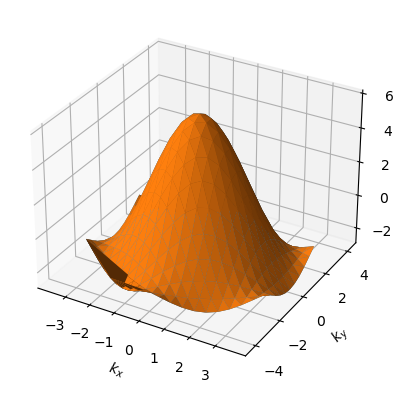

In [96]:
utils_auto.plot_2d_bandstructure(ham,en)

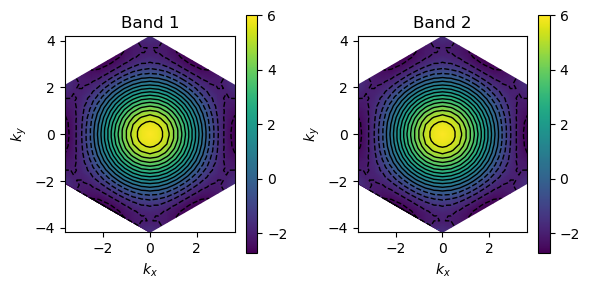

In [97]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Infinitesemial U limit

In [ ]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [99]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [100]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


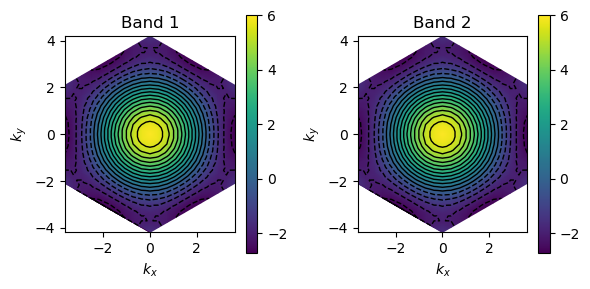

In [101]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Large U limit

In [ ]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)

In [103]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [104]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


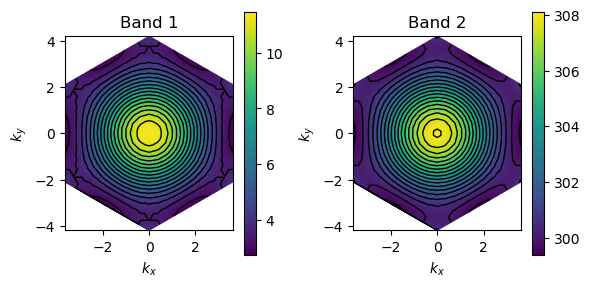

In [105]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [106]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is 287.91
U/T is 74.62
mean_U is 75.99


# Auto eval

## Task 1

In [107]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper='2004.04168')
    )


#################### THINKING ####################

Let's analyze the
Let's analyze the image and the problem systematically according to the rubric:

1. The image shows a momentum space mesh in what appears to be the first Brillouin zone.
2. I need to check if the point group symmetry matches what's expected for a triangular lattice.

For a triangular lattice in real space, the first Brillouin zone in momentum space should be a hexagon. Looking at the image, I can see:
- A hexagonal arrangement of points in k-space
- The axes are labeled as kx and ky
- The hexagon is centered at the origin (0,0)
- The points form a regular hexagonal mesh

The point group symmetry of a triangular lattice should have 6-fold rotational symmetry (C6v point group), which includes:
- 6-fold rotation (rotations by 60°)
- Mirror planes
- Inversion symmetry

The hexagonal mesh in the image indeed reflects this symmetry. The points are arranged with:
- 6-fold rotational symmetry around the origin
- Mirror symm

In [108]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [109]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper='2004.04168')
    )


#################### THINKING ####################

I
I need to analyze the image provided and determine if it shows a proper band structure plot for a triangular lattice using the Hartree-Fock method. Let's go through the rubric step by step:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that the Brillouin zone boundary forms a hexagon. This is indeed the expected shape for a triangular lattice in reciprocal space. The first Brillouin zone of a triangular lattice is a regular hexagon, which matches what is shown in the plots.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy regions (yellow) appear to be at the center of the Brillouin zone (k_x = 0, k_y = 0) for both Band 1 and Band 2.

2.2 Trace the pattern of energy variation across the zone:
The energy appears to

In [110]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [111]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper='2004.04168')
    )


#################### THINKING ####################

I
I need to analyze this image showing band structure plots for a triangular lattice system calculated using the Hartree-Fock method. Let me go through each point in the rubric:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that both Band 1 and Band 2 are plotted within a hexagonal boundary. This is indeed the correct shape for the first Brillouin zone of a triangular lattice, which should be a regular hexagon. So this point is satisfied.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy regions (shown in yellow) appear at the center of both Band 1 and Band 2 plots, around the Γ point (k_x = 0, k_y = 0).

2.2 Trace the pattern of energy variation across the zone:
The energy decreases radially outward from the center

In [112]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [113]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper='2004.04168',U_int=1e5)
    )


#################### THINKING ####################

I nee
I need to analyze the false color plots provided in the image to determine if they correctly represent an interacting-renormalized band structure in the first Brillouin zone after a self-consistent Hartree-Fock calculation with large interaction limit. Let me go through the rubric point by point:

1. Shape of the Brillouin zone boundary:
   - The image shows hexagonal boundaries for both bands, which is indeed the expected shape for a triangular lattice in reciprocal space. A triangular lattice in real space corresponds to a hexagonal Brillouin zone in k-space.
   - This point appears to be correct.

2. Symmetry of the energy distribution:
   2.1 Highest energy regions (yellow):
       - In both bands, the highest energy (yellow) appears at the center of the Brillouin zone (k_x = 0, k_y = 0).
       - Band 1 has a larger yellow region at the center compared to Band 2.
   
   2.2 Pattern of energy variation:
       - Both bands 

In [114]:
answer4=utils_auto.extract_result_content(result4['text'])

In [115]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '6' saved to final_answer.yaml
